https://github.com/Play-with-data/datasalon.git

1. 먼저 실습에 들어가기전 ....
- 머신러닝, 딥러닝, 빅데이터가 들어가게 해주세요.... : 많은 기업이 프로젝트를 진행하거나 업무기획을 할때 요구하던 대부분의 내용... 요즘에는 더할지도??? 
- 프로젝트 진행하던 사람도 실체는 알지 못하고 뜬구름 잡는 소리를 계속한다.... 
- 점점 많은 이들이 데이터 분석 자체보다는 이를 어떻게 활용할지에 대해 고민하는 것으로 보인다.
- 데이터 분석 자체가 아니라 '000를 위한 데이터 분석', '데이터분석을 통한 000 도출' 등의 표현이 더 적합해 보인다. 

2. 데이터분석
  1) 데이터분석을 진행할 효과적인 도구 : python
  2) 산업에 대한 이해

3. 파이썬 ; 언어를 배우기 위해서는 많이 듣고 말하는 과정이 언어에 필요한 것처럼, 코드를 많이 입력해보고 프로그래밍을 경험해보는 과정이 중요하다.
- 공부 목적보다는 실습이나 활용을 목적으로 책을 찾는 분들에게 적합한 책이다 

In [2]:
t1 = "hp010-6262-2588"
print(t1)

t2 = t1.strip()
print(t2, '\n')

t3 = t2.replace('hp','H.P')
print(t3)

t4 = t3.replace('H.P','')
t4 = t4.split('-')
print(t4)

hp010-6262-2588
hp010-6262-2588 

H.P010-6262-2588
['010', '6262', '2588']


## 02. 데이터 분석기초

In [3]:
import os 
os.getcwd()

'd:\\SNU\\실무파이썬\\직장인을 위한 데이터분석 실무 with 파이썬'

In [4]:
import pandas as pd
sample_1 = pd.read_excel('./datasalon-master/datasalon-master/02_개정판/2_Data_Analysis_Basic/files/sample_1.xlsx',
                         header = 1, skipfooter = 2, usecols = 'A:D')  
#header = 1 : 0번째 row는 제외, skipfooter = 2 ; 마지막 row의 2개 줄은 생략한다., usecols ; A부터 D까지의 columns을 사용한다.
print(sample_1.head(10),'\n')
print(sample_1.info())


  국적코드  성별    입국객수    전년동기
0  A01  남성  106320   85815
1  A01  여성  191436  125241
2  A31  남성     319     299
3  A31  여성      42      54
4  A18  남성  158912  124486
5  A18  여성  232943  163466 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
 3   전년동기    6 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 320.0+ bytes
None


In [5]:
print(sample_1.describe())

                입국객수           전년동기
count       6.000000       6.000000
mean   114995.333333   83226.833333
std     98105.752006   68858.227184
min        42.000000      54.000000
25%     26819.250000   21678.000000
50%    132616.000000  105150.500000
75%    183305.000000  125052.250000
max    232943.000000  163466.000000


In [6]:
sample_1

,국적코드,성별,입국객수,전년동기
0,A01,남성,106320,85815
1,A01,여성,191436,125241
2,A31,남성,319,299
3,A31,여성,42,54
4,A18,남성,158912,124486
5,A18,여성,232943,163466


In [7]:
sample_1['국적코드']

0    A01
1    A01
2    A31
3    A31
4    A18
5    A18
Name: 국적코드, dtype: object

In [8]:
sample_1[['국적코드', '입국객수']]

,국적코드,입국객수
0,A01,106320
1,A01,191436
2,A31,319
3,A31,42
4,A18,158912
5,A18,232943


In [9]:
# 데이터 column 추가
sample_1['기준년월'] = '2019-11'
sample_1

,국적코드,성별,입국객수,전년동기,기준년월
0,A01,남성,106320,85815,2019-11
1,A01,여성,191436,125241,2019-11
2,A31,남성,319,299,2019-11
3,A31,여성,42,54,2019-11
4,A18,남성,158912,124486,2019-11
5,A18,여성,232943,163466,2019-11


In [10]:
#성별이 남성인 사람만 골라내서 출력.
condition = sample_1['성별'] == '남성'
condition

sample_1[condition]

,국적코드,성별,입국객수,전년동기,기준년월
0,A01,남성,106320,85815,2019-11
2,A31,남성,319,299,2019-11
4,A18,남성,158912,124486,2019-11


In [11]:
# 입국객 수 150,000 명 이상인 경우만 찾아보자
condition = (sample_1['입국객수']>= 150000)
sample_1[condition]

,국적코드,성별,입국객수,전년동기,기준년월
1,A01,여성,191436,125241,2019-11
4,A18,남성,158912,124486,2019-11
5,A18,여성,232943,163466,2019-11


In [12]:
#여기서 문자열 입력할 떄는 반드시 '' 따옴표 입력
conditions = (sample_1['성별'] == '남성') & (sample_1['입국객수']>=150000)
print(conditions, '\n')

sample_1[conditions]

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool 



,국적코드,성별,입국객수,전년동기,기준년월
4,A18,남성,158912,124486,2019-11


In [13]:
# 국적코드표 엑셀파일 불러오기
code_master = pd.read_excel('./datasalon-master/datasalon-master/02_개정판/2_Data_Analysis_Basic/files/sample_codemaster.xlsx')
code_master

,국적코드,국적명
0,A01,일본
1,A02,대만
2,A03,홍콩
3,A18,중국
4,A19,이란
5,A22,우즈베키스탄
6,A23,카자흐스탄
7,A99,아시아 기타


In [14]:
# sample_1 데이터에 통합하기
## 설명 : left표는 sample_1 이고 right표는 code_master이다. how = 'left'는 left표를 기준으로 삼겠다는 것이다.
## 설명 : left_on은 왼쪽 테이블의 기준 column은 국적코드 이다. right_on도 동일하다. 
## NaN은 아마 A31에 대한 국적명이 없나보다.
sample_1_code = pd.merge(left = sample_1, right = code_master, how = 'left', left_on = '국적코드', right_on = '국적코드')
sample_1_code

,국적코드,성별,입국객수,전년동기,기준년월,국적명
0,A01,남성,106320,85815,2019-11,일본
1,A01,여성,191436,125241,2019-11,일본
2,A31,남성,319,299,2019-11,NaN
3,A31,여성,42,54,2019-11,NaN
4,A18,남성,158912,124486,2019-11,중국
5,A18,여성,232943,163466,2019-11,중국


데이터 통합 - 아래로 통합(append)
- 실무에서는 효율성을 위해 데이터를 월별 파일로 관리하는 경우가 많다. 
- 월별 데이터 분석을 하기 위해서는 데이터를 먼저 통합해야 한다. (아래로 통합해야겠지?) ; 이걸 모르면 복붙하는 수고를 범할지도 ㅎㅎ .... 

In [15]:
# 데이터를 아래로 통합하기 위해서는 칼럼 순서가 동일해야 한다. 
sample_2 = pd.read_excel('./datasalon-master/datasalon-master/02_개정판/2_Data_Analysis_Basic/files/sample_2.xlsx',
                         header = 1, skipfooter = 2, usecols = 'A:D')
sample_2['기준년월'] = '2019-11'
sample_2_code = pd.merge(left = sample_2, right = code_master, how = 'left', left_on = '국적코드', right_on = '국적코드')
sample_2_code
# 아래로 통합하기 위해서는 sample_1_code와 sample_2_code의 칼럼 순서가 동일해야 한다. (동일함)

,국적코드,성별,입국객수,전년동기,기준년월,국적명
0,A01,남성,92556,75992,2019-11,일본
1,A01,여성,163737,115397,2019-11,일본
2,A18,남성,155540,129908,2019-11,중국
3,A18,여성,249023,191236,2019-11,중국


In [16]:
sample = sample_1_code.append(sample_2_code, ignore_index = True) #index 를 ignore한다는 것은 기존의 index를 반영하는 것이므로 True로 해줘야 한다.
sample

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27752\2426678731.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = sample_1_code.append(sample_2_code, ignore_index = True) #index 를 ignore한다는 것은 기존의 index를 반영하는 것이므로 True로 해줘야 한다.


,국적코드,성별,입국객수,전년동기,기준년월,국적명
0,A01,남성,106320,85815,2019-11,일본
1,A01,여성,191436,125241,2019-11,일본
2,A31,남성,319,299,2019-11,NaN
3,A31,여성,42,54,2019-11,NaN
4,A18,남성,158912,124486,2019-11,중국
5,A18,여성,232943,163466,2019-11,중국
6,A01,남성,92556,75992,2019-11,일본
7,A01,여성,163737,115397,2019-11,일본
8,A18,남성,155540,129908,2019-11,중국
9,A18,여성,249023,191236,2019-11,중국


In [17]:
# 데이터 저장하기
sample.to_excel('./datasalon-master/datasalon-master/02_개정판/2_Data_Analysis_Basic/files/sample_index_false.xlsx', index =False)

sample_index_false = pd.read_excel('./datasalon-master/datasalon-master/02_개정판/2_Data_Analysis_Basic/files/sample_index_false.xlsx')

sample_index_false

,국적코드,성별,입국객수,전년동기,기준년월,국적명
0,A01,남성,106320,85815,2019-11,일본
1,A01,여성,191436,125241,2019-11,일본
2,A31,남성,319,299,2019-11,NaN
3,A31,여성,42,54,2019-11,NaN
4,A18,남성,158912,124486,2019-11,중국
5,A18,여성,232943,163466,2019-11,중국
6,A01,남성,92556,75992,2019-11,일본
7,A01,여성,163737,115397,2019-11,일본
8,A18,남성,155540,129908,2019-11,중국
9,A18,여성,249023,191236,2019-11,중국


### 2.1.8 데이터 집계(pivot_table)
- 데이터를 원하는 형태로 손쉽게 집계 가능하다
- 데이터를 날짜별로 집계 or 데이터를 연령별로 추출 or 00별로 데이터를 집계할때 쓰는 기능 


In [18]:
# 국적과 기준년월에 따른 입국객수의 평균값을 추출한다
sample_pivot = sample.pivot_table(values = '입국객수', index = '국적명', columns = '기준년월', aggfunc = 'mean')
#values 는 보고자 하는 값, index는 row(행), columns는 column(열), aggfunc 는 평균을 계산한다
#기존 칼럼들을 어떤 영역(행, 열)에 위치할 것인지 판단한다 
sample_pivot

기준년월,2019-11
국적명,
일본,138512.25
중국,199104.50


04. COVID의 영향으로 중국인 관광객이 얼마나 줄었을까

In [19]:
import os
os.getcwd()

'd:\\SNU\\실무파이썬\\직장인을 위한 데이터분석 실무 with 파이썬'

In [20]:
# 4.1 외국인 출입국 통계 데이터 구하기 

import pandas as pd
kto_201901 = pd.read_excel('./datasalon-master/datasalon-master/02_개정판/4_Tourists_Event/files/kto_201901.xlsx',
                           header = 1, 
                           usecols = "A:G",
                           skipfooter = 4) #skipfooter 은 마지막 4줄 생략 
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [21]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


In [22]:
# 201901 데이터를 불러온 것처럼 동일한 방법으로 201001부터 각 월별데이터를 불러와서 하나로 통합해보자 

kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [23]:
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [24]:
# 각 column별 데이터에서 min 이 0인값이 무엇인지 확인해보자
condition = (kto_201901['관광'] == 0 ) | (kto_201901['상용'] == 0) | (kto_201901['공용'] == 0) | (kto_201901['유학/연수'] == 0)
kto_201901[condition]
# 교포소계와 교포 row가 모두 0으로 확인되었다 

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [25]:
# 데이터프레임에 기준년월 추가 : 위의 데이터는 201901 이다. 

kto_201901['기준년월'] = '2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [26]:
# 국적 데이터만 남기기
kto_201901['국적'].unique()

# 아래 값들을 보면 '주' 와 '국가' 가 섞여있음 ; continents_list로 '주' 를 묶어보자 

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [27]:
continent_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
continent_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [28]:
condition = (kto_201901.국적.isin(continent_list) == False) #대륙목록에 해당하는 값을 False로 지정하고 제외한다. 
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique()



array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [29]:
len(kto_201901_country['국적'].unique())

60

In [30]:
kto_201901_country #이때 index 값이 0에서 시작해야 하는데 0의 index가 아시아주였기에 다시 index를 0부터 초기화해준다. 

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01
6,말레이시아,19043,95,7,99,2821,22065,2019-01
7,필리핀,14279,211,161,184,15638,30473,2019-01
8,인도네시아,14183,136,38,187,4298,18842,2019-01
9,싱가포르,8372,94,8,48,1333,9855,2019-01
10,미얀마,1304,10,31,67,3877,5289,2019-01


In [31]:
kto_201901_country_newindex = kto_201901_country.reset_index(drop=True)
kto_201901_country_newindex
# 6개의 continent가 제거되었다. 

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01
5,말레이시아,19043,95,7,99,2821,22065,2019-01
6,필리핀,14279,211,161,184,15638,30473,2019-01
7,인도네시아,14183,136,38,187,4298,18842,2019-01
8,싱가포르,8372,94,8,48,1333,9855,2019-01
9,미얀마,1304,10,31,67,3877,5289,2019-01


In [32]:
# 대륙 column 만들기 : 각 국가들이 어느 대륙에 속하는지 만들어보자 ; 새로운 column을 추가해서 일본 : 아시아 이렇게 대륙 컬럼을 만들어보자 
continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
continents

['아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아메리카',
 '아메리카',
 '아메리카',
 '아메리카',
 '아메리카',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '오세아니아',
 '오세아니아',
 '오세아니아',
 '아프리카',
 '아프리카',
 '기타대륙',
 '교포']

In [33]:
kto_201901_country_newindex['대륙'] = continents

kto_201901_country_newindex.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아
56,남아프리카공화국,368,9,1,6,616,1000,2019-01,아프리카
57,아프리카 기타,768,718,90,206,908,2690,2019-01,아프리카
58,국적미상,33,4,0,1,16,54,2019-01,기타대륙
59,교포,0,0,0,0,15526,15526,2019-01,교포


In [34]:
# 국적별 관광객 비율 살펴보기 
kto_201901_country_newindex['관광객비율(%)'] = round(kto_201901_country_newindex['관광'] / kto_201901_country_newindex['계'] * 100 , 1)
# 총 인원에서 관광 목적의 인원의 비율로 나눈다. 

kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3


In [35]:
kto_201901_country_newindex.sort_values(by = '관광객비율(%)', ascending = False).head()
#내림차순으로 정렬 

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4


In [36]:
kto_201901_country_newindex.sort_values(by = '관광객비율(%)', ascending = True).head()
# 오름차순 정렬 

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
59,교포,0,0,0,0,15526,15526,2019-01,교포,0.0
14,방글라데시,149,126,27,97,848,1247,2019-01,아시아,11.9
12,스리랑카,157,54,5,28,1043,1287,2019-01,아시아,12.2
13,파키스탄,238,178,10,193,413,1032,2019-01,아시아,23.1
15,캄보디아,635,39,55,51,1915,2695,2019-01,아시아,23.6


In [37]:
# 대륙별로 관광객 비율의 평균은 어떻게 되는지 확인해보자
kto_201901_country_newindex.pivot_table(values = '관광객비율(%)', index = '대륙', aggfunc = 'mean')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [38]:
# 중국인 중에서 관광목적으로 방문하는 비율이 얼마나 되는지 확인

condition = (kto_201901_country_newindex['국적'] == '중국')
kto_201901_country_newindex[condition]


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


In [39]:
# 기준년월별로 전체 외국인 관광객 대비 국적별 관광객 비율 살펴보기 

# 전체 외국인 대비 국적별 관광객의 비율을 계산해보자 
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum # 201901 에 한국을 방문한 총 외국인 관광객 수 

884293

In [40]:
kto_201901_country_newindex['전체비율(%)'] = round(kto_201901_country_newindex['관광'] / tourist_sum * 100 , 1)
kto_201901_country_newindex.head(60)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3,2.2
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.9,1.6
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.3,1.6
8,싱가포르,8372,94,8,48,1333,9855,2019-01,아시아,85.0,0.9
9,미얀마,1304,10,31,67,3877,5289,2019-01,아시아,24.7,0.1


In [41]:
# 우리나라를 방문하는 외국인 관광객 중 비율이 높은 상위 5개국과 그 비율
kto_201901_country_newindex.sort_values('전체비율(%)', ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9


In [42]:
# 반복되는 작업을 def 함수로 만들어보자 
def create_kto_data(yy, mm) :
    # 1. 불러올 엑셀파일 경로 지정 
    file_path = f'./datasalon-master/datasalon-master/02_개정판/4_Tourists_Event/files/kto_{yy}{mm}.xlsx'
    
    # 2. 엑셀 파일 불러오기
    df = pd.read_excel(file_path, header = 1, skipfooter = 4, usecols = "A:G")
    
    # 3. '기준년월' 칼럼 추가
    df['기준년월'] = f'{yy}{mm}'
    
    # 4. '국적' 칼럼에서 대륙은 제거하고 국가만 남기기 
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계'] #제거할 대륙명 선정하기
    condition = (df['국적'].isin(ignore_list) == False) #대륙 미포함 조건
    df_country = df[condition].reset_index(drop=True)
    
    # 5. '대륙' 칼럼 추가
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['대양주']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포'] #대륙칼럼 생성을 위한 목록 만들어 놓기 
    df_country['대륙'] = continents
        
    # 6. 국가별 '관광객비율(%)' column 추가
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100 , 1)
    
    # 7. '전체비율(%)' column 추가
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100 , 1)
    
    # 8. 결과 출력
    return(df_country)
    

In [43]:
# 함수가 잘 생성되었는지 확인하기
kto_test = create_kto_data(2018, 12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,201812,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,201812,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,201812,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,201812,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,201812,아시아,87.4,4.2


In [44]:
# 반복문을 통해 다수의 엑셀데이터를 불러와서 합치기 
for yy in range(2010, 2021) : 
    for mm in range(1, 13) :
        yymm = f'{yy}{mm}'
        
        print(yymm) # 여기서 201001이 되어야 하는데 20101이 되어서 0을 추가할 방법을 찾아야 한다 

20101
20102
20103
20104
20105
20106
20107
20108
20109
201010
201011
201012
20111
20112
20113
20114
20115
20116
20117
20118
20119
201110
201111
201112
20121
20122
20123
20124
20125
20126
20127
20128
20129
201210
201211
201212
20131
20132
20133
20134
20135
20136
20137
20138
20139
201310
201311
201312
20141
20142
20143
20144
20145
20146
20147
20148
20149
201410
201411
201412
20151
20152
20153
20154
20155
20156
20157
20158
20159
201510
201511
201512
20161
20162
20163
20164
20165
20166
20167
20168
20169
201610
201611
201612
20171
20172
20173
20174
20175
20176
20177
20178
20179
201710
201711
201712
20181
20182
20183
20184
20185
20186
20187
20188
20189
201810
201811
201812
20191
20192
20193
20194
20195
20196
20197
20198
20199
201910
201911
201912
20201
20202
20203
20204
20205
20206
20207
20208
20209
202010
202011
202012


In [45]:
mm = 1
print(mm)

# zfill() 함수 이용해서 0을 포함한 두자리로 출력해보기
print(str(mm).zfill(2)) #1을 2자리로 만들면 01이 되겠지? 
print(str(mm).zfill(3))

1
01
001


In [46]:
for yy in range(2010, 2021) :
    for mm in range(1, 13) :
        mm_str = str(mm).zfill(2)
        yymm = f'{yy}{mm_str}'
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [47]:
# 엑셀파일 불러와서 데이터를 하나로 통합하는 작업 실시
df = pd.DataFrame() #데이터를 담을 빈 데이터프레임 만들기

for yy in range(2010, 2021) :
    for mm in range(1, 13):
        try : 
            temp = create_kto_data(str(yy), str(mm).zfill(2))
            df = df.append(temp, ignore_index = True)
        except :
            pass
        
        
# 오류나는 이유 : 202006은 파일이 없음 05까지만 있음 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27752\793128444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27752\793128444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27752\793128444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27752\793128444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, i

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27752\793128444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27752\793128444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27752\793128444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27752\793128444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, i

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7500 non-null   object 
 1   관광        7500 non-null   int64  
 2   상용        7500 non-null   int64  
 3   공용        7500 non-null   int64  
 4   유학/연수     7500 non-null   int64  
 5   기타        7500 non-null   int64  
 6   계         7500 non-null   int64  
 7   기준년월      7500 non-null   object 
 8   대륙        7500 non-null   object 
 9   관광객비율(%)  7500 non-null   float64
 10  전체비율(%)   7500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 644.7+ KB


In [49]:
# 통합 데이터를 엑셀파일로 저장하기
df.to_excel('./datasalon-master/datasalon-master/02_개정판/4_Tourists_Event/데이터파일/kto_total.xlsx', index = False)

In [50]:
# 국적별 필터링된 데이터를 엑셀 파일로 저장하기 
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,201001,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,201002,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,201003,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,201004,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,201005,아시아,57.8,17.0
317,중국,87080,12375,293,3293,47078,150119,201006,아시아,58.0,16.7
377,중국,122432,10608,239,4309,57600,195188,201007,아시아,62.7,22.6
437,중국,142180,11049,232,26427,62099,241987,201008,아시아,58.8,24.5
497,중국,93545,10013,293,11374,60971,176196,201009,아시아,53.1,17.1
557,중국,107237,11371,374,3102,59344,181428,201010,아시아,59.1,16.3


In [51]:
# 저장된 df_filter 데이터를 '[국적별 관광객 데이터] 중국.xlsx 파일로 저장하기

file_path = './datasalon-master/datasalon-master/02_개정판/4_Tourists_Event/데이터파일/[국적별 관광객 데이터] 중국.xlsx'
df_filter.to_excel(file_path, index = False)

In [52]:
# 국적 리스트 만들기
country_list = df['국적'].unique()
country_list

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [53]:
len(country_list)

60

In [54]:
for country in country_list : 
    # 국적으로 필터링해보자
    condition = (df['국적'] == country)
    df_filter = df[condition]
    
    # 국적명을 반영한 파일명을 만들기
    file_path = f'./datasalon-master/datasalon-master/02_개정판/4_Tourists_Event/데이터파일/[국적별 관광객 데이터] {country}.xlsx'
    
    # 정해놓은 파일명으로 저장하기
    
    df_filter.to_excel(file_path, index = False)

In [55]:
# 데이터 시각화의 중요성 

# 중국 데이터 확인
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head(10) # 너무 나열되어 있으니 보기가 싫네 ... 

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,201001,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,201002,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,201003,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,201004,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,201005,아시아,57.8,17.0
317,중국,87080,12375,293,3293,47078,150119,201006,아시아,58.0,16.7
377,중국,122432,10608,239,4309,57600,195188,201007,아시아,62.7,22.6
437,중국,142180,11049,232,26427,62099,241987,201008,아시아,58.8,24.5
497,중국,93545,10013,293,11374,60971,176196,201009,아시아,53.1,17.1
557,중국,107237,11371,374,3102,59344,181428,201010,아시아,59.1,16.3


In [56]:
# 시계열 그래프 와 히트맵으로 시각화하기
import pandas as pd 
df = pd.read_excel('./datasalon-master/datasalon-master/02_개정판/4_Tourists_Event/데이터파일/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,201001,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,201001,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,201001,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,201001,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,201001,아시아,75.1,3.3


In [57]:
# 유용한 코드 : 한글 글꼴 설정시
# 주피터에서 한글 글꼴 설정이 안되기 때문에 출력 시 글꼴을 설정해야 한다. 
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows' :
    path = 'c:Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin' :
    rc('font', family = 'AppleGothic')
else :
    print('Check your OS')
    
# 시각화 할떄 꼭 복사해서 붙여넣는 방식으로 활용하자 !!! 

In [90]:
import matplotlib.pyplot as plt

# 예제 4-44 중국 국적 데이터 필터링하기 
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,201001,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,201002,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,201003,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,201004,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,201005,아시아,57.8,17.0


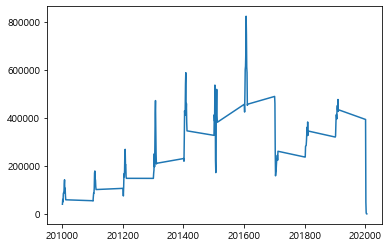

In [91]:
# 예제 4-45 시계열 그래프 그리기 1
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

In [85]:
def yymm():
    yymm_list = []
    for yy in range(2010, 2021):
        mm = 1
        str_mm = str(mm).zfill(2)
        yymm_list.append(f'{yy}-{str_mm}')
    return yymm_list


result = yymm()

print(result)


['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01']


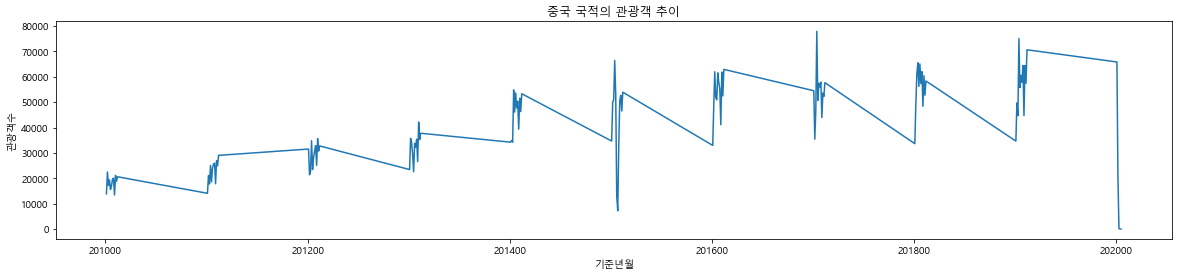

In [97]:
# 예제 4-46 시계열 그래프 그리기 2(꾸미기)
## 그래프 크기 조절 
plt.figure(figsize = (20, 4))

## 그래프 내용 설정 
plt.plot(df_filter['기준년월'], df_filter['관광'])

## 그래프 타이틀, X축, Y축 이름 달기 
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

## x 축 눈금 값 설정 
# plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

## 그래프 표현하기 
plt.show()

In [103]:
# 기준년월 열을 문자열로 변환
df['기준년월'] = df['기준년월'].astype(str)


In [104]:
# heatmap 그래프 그리기 
df['년도'] = df['기준년월'].str[:4]
df['월'] = df['기준년월'].str[5:7]
df.head()


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,201001,아시아,97.0,50.6,2010,1
1,대만,35788,41,17,37,516,36399,201001,아시아,98.3,8.9,2010,1
2,홍콩,13874,55,0,21,595,14545,201001,아시아,95.4,3.5,2010,1
3,마카오,554,0,0,0,0,554,201001,아시아,100.0,0.1,2010,1
4,태국,13374,39,13,53,4335,17814,201001,아시아,75.1,3.3,2010,1


In [105]:
## 중국인 관광객 필터링
condition = (df['국적'] == '중국')
df_filter = df[condition]

df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,201001,아시아,44.3,10.1,2010,1
77,중국,60590,7907,68,29546,42460,140571,201002,아시아,43.1,13.6,2010,2
137,중국,50330,13549,174,14924,62480,141457,201003,아시아,35.6,9.2,2010,3
197,중국,84252,13306,212,2199,47711,147680,201004,아시아,57.1,15.5,2010,4
257,중국,89056,12325,360,2931,49394,154066,201005,아시아,57.8,17.0,2010,5


In [106]:
df_pivot = df_filter.pivot_table(values = '관광', index = '년도', columns = '월')

df_pivot

월,0,1,2,3,4,5,6,7,8,9
년도,,,,,,,,,,
2010,107237.0,58055.5,59788.5,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0
2011,141824.0,84463.0,77734.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0
2012,204866.0,131054.5,111607.5,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0
2013,249850.0,178146.5,190172.5,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0
2014,459708.0,305912.0,282745.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0
2015,518651.0,368430.0,397409.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0
2016,588561.0,454359.0,440557.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0
2017,244541.0,356499.5,359967.5,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0
2018,382922.0,282244.5,291105.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0


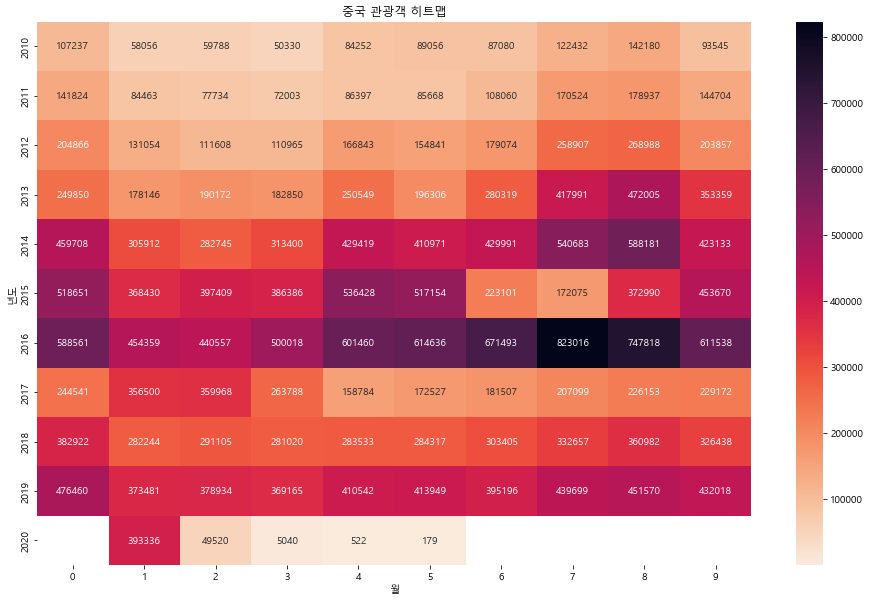

In [110]:
## heatmap 은 matplotlib이 아닌 seaborn을 통해서 표현한다
import seaborn as sns 

plt.figure(figsize = (16,10))

sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')
# df_pivot는 데이터를 지정한다.
# anonot 은 실제값을 표시하는지 여부, fmt는 소수점의 형태, cmap는 색 조합 

plt.title('중국 관광객 히트맵')

plt.show()

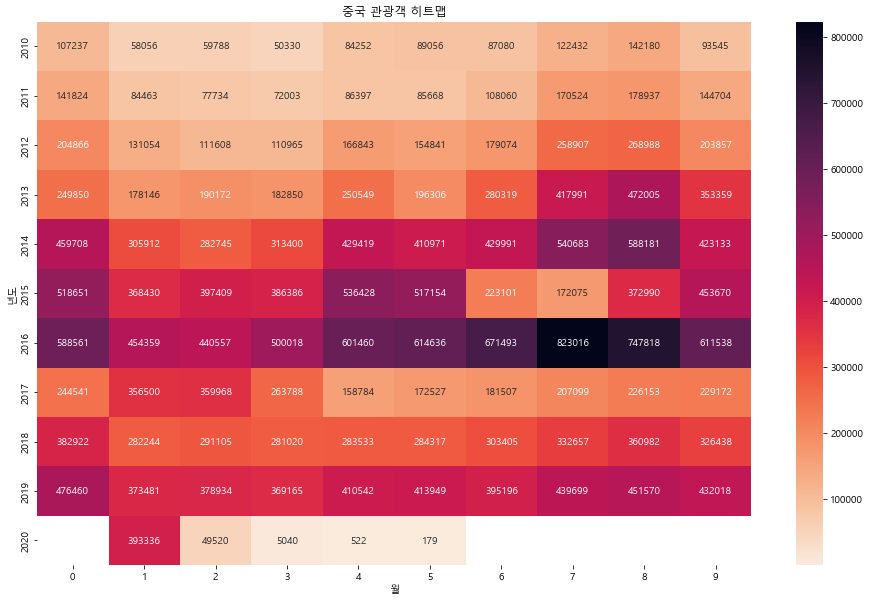

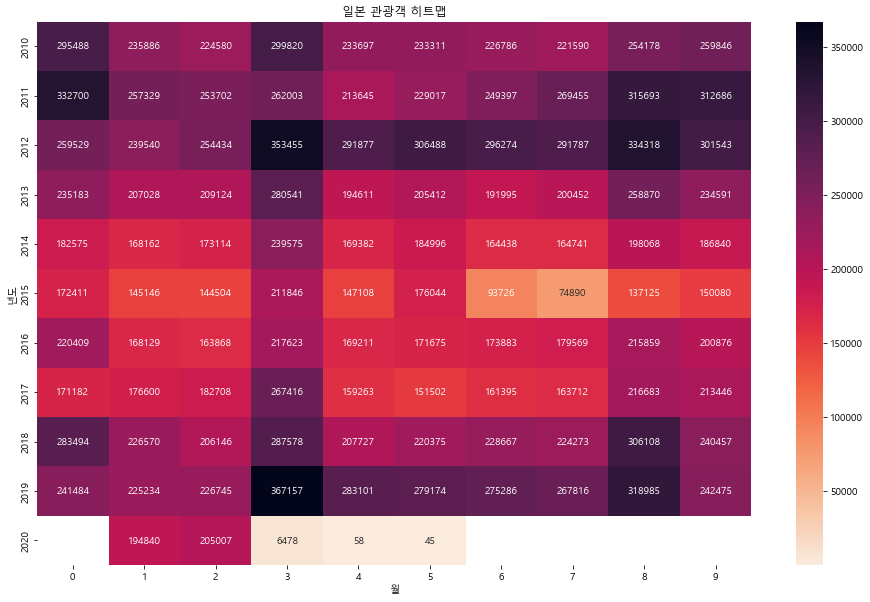

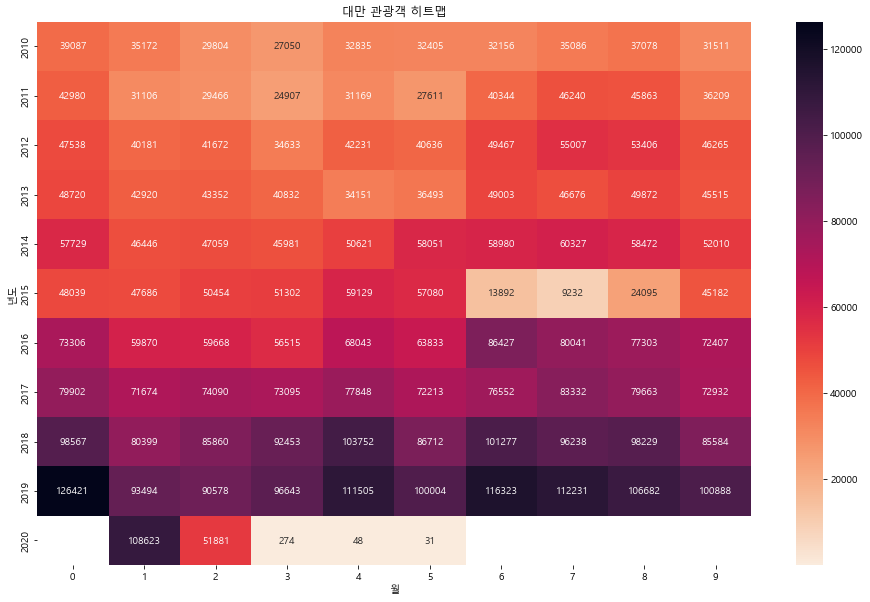

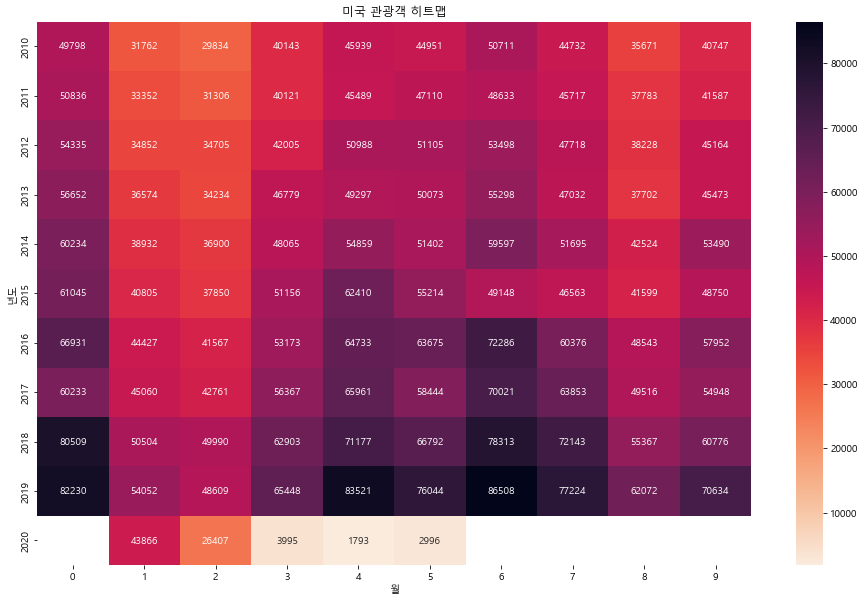

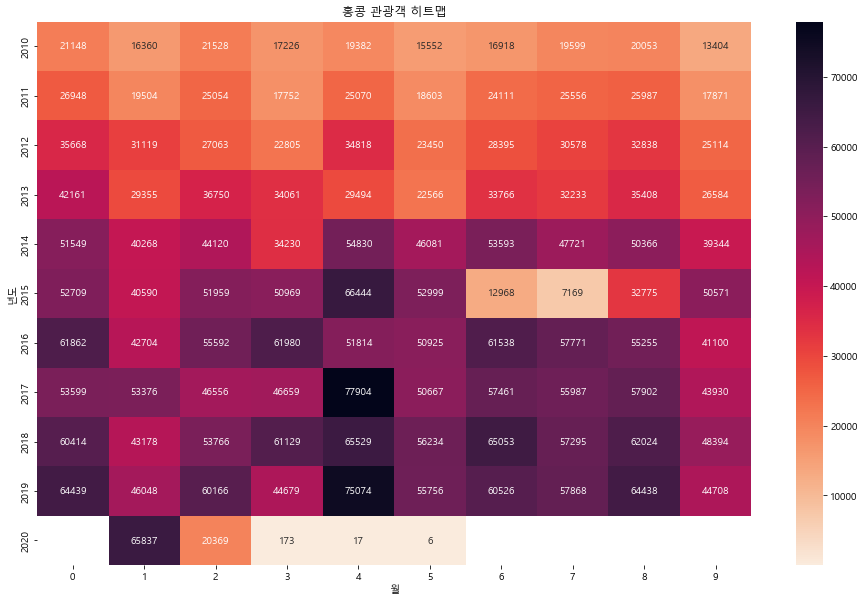

In [112]:
for country in country_list : 
    condition = (df['국적'] == country)
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광', 
                                     index = '년도',
                                     columns = '월')
    
    # 그래프 크기설정
    plt.figure(figsize = (16,10))
    
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')
    
    plt.title(f'{country} 관광객 히트맵')
    
    plt.show()

In [113]:
os.getcwd()

'd:\\SNU\\실무파이썬\\직장인을 위한 데이터분석 실무 with 파이썬'

In [ ]:
## 06 우리 동네에는 스타벅스 왜 없을까? 
